<a href="https://colab.research.google.com/github/johnmoses12/Vector-Borne-Disease-Prediction/blob/main/2_Predicting_the_Spread_of_Malaria_and_Dengue_Using_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting the Spread of Malaria and Dengue Using Data Science


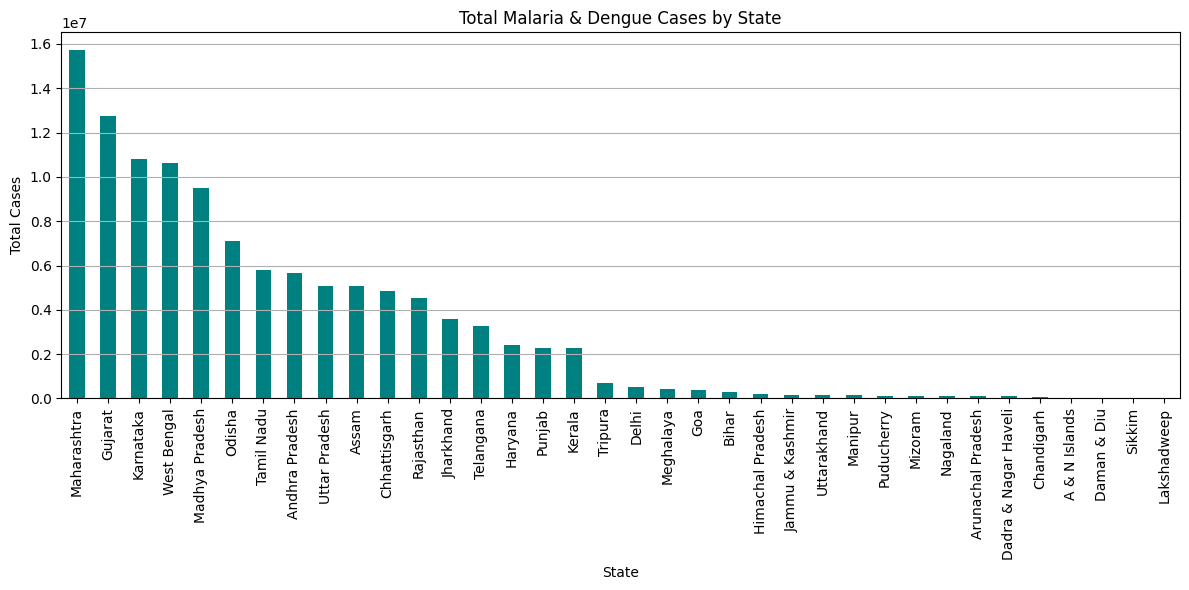

R² Score: 0.9963718830246573
RMSE: 2921.90880059406


In [ ]:
# 🦟 Predicting the Spread of Malaria and Dengue Using Data Science

# Step 1: Install & Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset (No need to upload each time if already present)
file_path = 'HMIS report of all States and Districts Across the Months for 2019-20.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

# Step 3: Filter for Malaria and Dengue
keywords = ['malaria', 'dengue']
disease_df = df[df['Parameters'].str.lower().str.contains('|'.join(keywords), na=False)]

# Step 4: Select Total Columns and Clean
cols_to_keep = ['State', 'Parameters'] + [col for col in df.columns if 'Total' in col]
filtered_df = disease_df[cols_to_keep].copy()

# Drop rows with all NaNs in month columns
month_cols = [col for col in filtered_df.columns if 'Total' in col and col not in ['Total - Total [(A+B) or (C+D)]']]
filtered_df.dropna(subset=month_cols, how='all', inplace=True)
filtered_df.reset_index(drop=True, inplace=True)

# Step 5: Aggregate Monthly Disease Data by State
agg_df = filtered_df.groupby(['State']).sum(numeric_only=True)

# Optional: Visualize total dengue/malaria cases statewise
plt.figure(figsize=(12,6))
agg_df['Total - Total [(A+B) or (C+D)]'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Total Malaria & Dengue Cases by State')
plt.ylabel('Total Cases')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 6: Prepare Dataset for ML Modeling
ml_df = filtered_df.copy()
ml_df = ml_df.dropna(subset=month_cols)

# Features = Monthly data excluding March; Target = March data
X = ml_df[[col for col in month_cols if 'March' not in col and 'Total - Total' not in col]]
y = ml_df['March - Total [(A+B) or (C+D)]']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Evaluate Model
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
